In [ ]:
#EDA (Exploratory Data Analysis)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving winemag-data-130k-v2.csv to winemag-data-130k-v2.csv


In [ ]:
! pip install pyspark >& /dev/null

In [2]:
from pyspark.sql.types import StructType, StructField, IntegerType, TimestampType, StringType, DoubleType
from pyspark.sql import functions as f
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

In [22]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("YourAppName").getOrCreate()

file_path = "winemag-data-130k-v2.csv"

df_original = spark.read.csv(file_path, header=True, inferSchema=True)

df_original.select(avg("points")).show()

+-----------------+
|      avg(points)|
+-----------------+
|88.44617681462783|
+-----------------+



In [4]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt

In [32]:
df_original = df_original.withColumn("points", col("points").cast(IntegerType()))
df_original = df_original.withColumn("price", col("price").cast(IntegerType()))

([10, 28, 46, 64, 82, 100], [1, 0, 0, 1090, 128853])


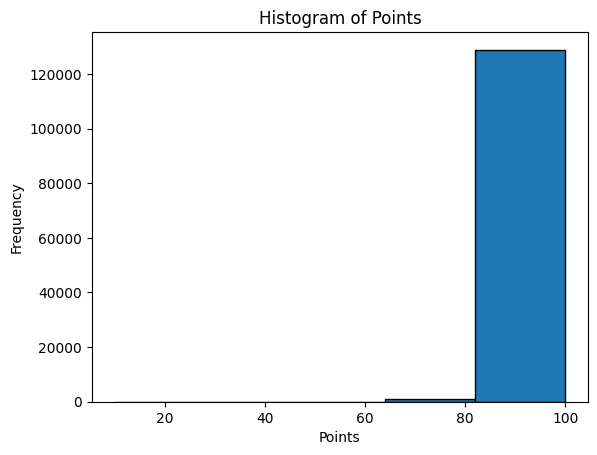

In [30]:


df_histogram_points_frequency = df_original.withColumn("points", col("points").cast(IntegerType()))

histogram_data = df_histogram_points_frequency.select("points").rdd.flatMap(lambda x: x).histogram(5)
print(histogram_data)

bins = histogram_data[0]
frequencies = histogram_data[1]

plt.hist(bins[:-1], bins, weights=frequencies, edgecolor="black")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.title("Histogram of Points")
plt.show()

In [31]:
df_histogram_points_frequency.groupBy("variety").count().orderBy(col("count").desc()).show(200)

+--------------------+-----+
|             variety|count|
+--------------------+-----+
|          Pinot Noir|13270|
|          Chardonnay|11752|
|  Cabernet Sauvignon| 9467|
|           Red Blend| 8945|
|Bordeaux-style Re...| 6914|
|            Riesling| 5184|
|     Sauvignon Blanc| 4965|
|               Syrah| 4142|
|                Rosé| 3563|
|              Merlot| 3102|
|            Nebbiolo| 2803|
|           Zinfandel| 2714|
|          Sangiovese| 2707|
|              Malbec| 2652|
|      Portuguese Red| 2466|
|         White Blend| 2360|
|     Sparkling Blend| 2153|
|         Tempranillo| 1810|
|Rhône-style Red B...| 1471|
|          Pinot Gris| 1455|
|     Champagne Blend| 1396|
|      Cabernet Franc| 1353|
|    Grüner Veltliner| 1344|
|    Portuguese White| 1159|
|Bordeaux-style Wh...| 1066|
|        Pinot Grigio| 1049|
|               Gamay| 1025|
|      Gewürztraminer| 1012|
|            Viognier|  996|
|              Shiraz|  836|
|        Petite Sirah|  770|
|   Sangiovese

([4.0, 663.2, 1322.4, 1981.6000000000001, 2640.8, 3300], [120907, 40, 3, 5, 1])


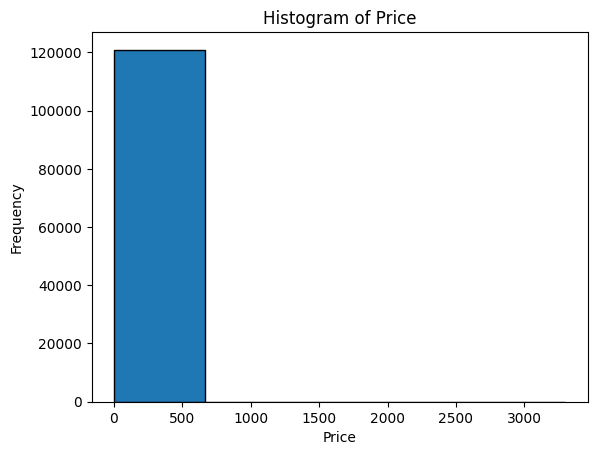

In [33]:
df_price = df_original.withColumn("price", col("price").cast(IntegerType()))

histogram_data_price = df_price.select("price").rdd.flatMap(lambda x: x).histogram(5)
print(histogram_data_price)

bins_price = histogram_data_price[0]
frequencies_price = histogram_data_price[1]

plt.hist(bins_price[:-1], bins_price, weights=frequencies_price, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.show()

In [34]:
from matplotlib.ticker import MaxNLocator

In [35]:
df_scatterplot_points_price = df_original.withColumn("price", col("price").cast("int"))
df_scatterplot_points_price = df_scatterplot_points_price.withColumn("points", col("points").cast("int"))

sub_df = df_scatterplot_points_price.select("price", "points")
sub_df_noNull = sub_df.dropna()

In [36]:
count = df_scatterplot_points_price.filter(df_scatterplot_points_price.points < 80).count()
print(count)

2


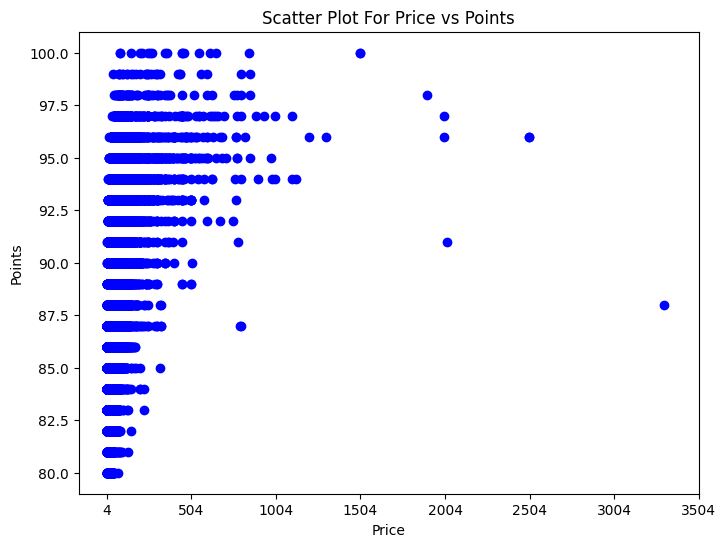

In [37]:
df_filtered_no_null = sub_df_noNull.filter(df_scatterplot_points_price.points >= 80)
pandas_df = df_filtered_no_null.toPandas()


plt.figure(figsize=(8, 6))
plt.scatter(pandas_df["price"], pandas_df["points"], color='blue')
plt.title("Scatter Plot For Price vs Points")
plt.xlabel("Price")
plt.ylabel("Points")

min_price = pandas_df["price"].min()
max_price = pandas_df["price"].max()

plt.xticks(range(min_price, max_price + 500, 500))

plt.show()

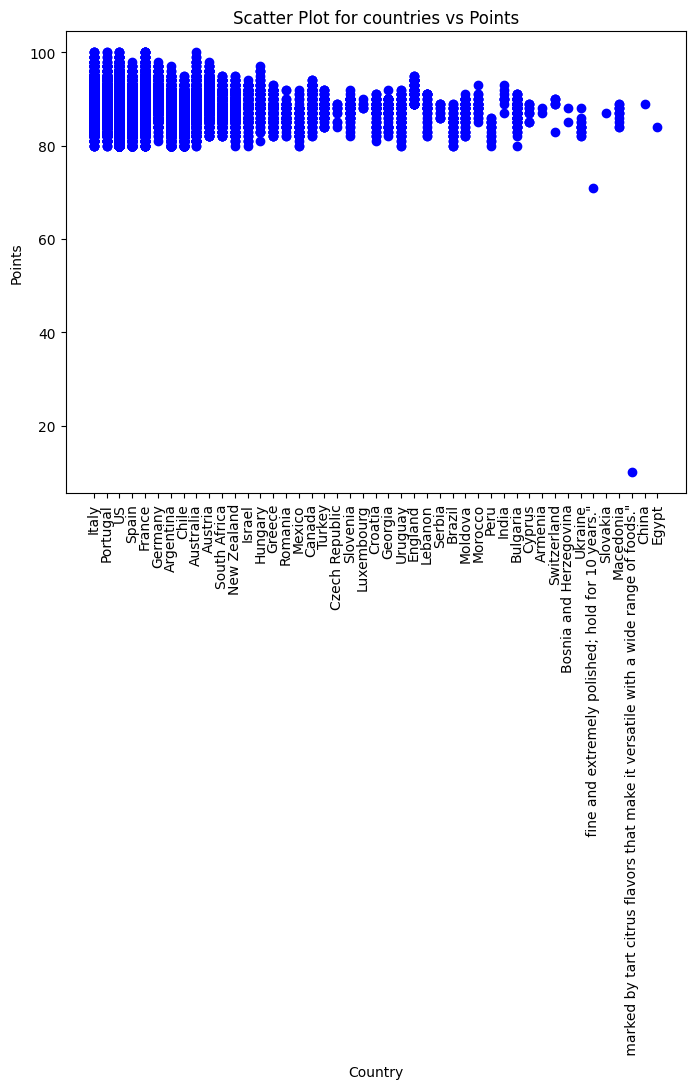

In [38]:
sub_df_country = df_original.select("country", "points")
sub_df_noNull_country = sub_df_country.dropna()

pandas_df_country = sub_df_noNull_country.toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(pandas_df_country["country"], pandas_df_country["points"], color='blue')
plt.title("Scatter Plot for countries vs Points")
plt.xlabel("Country")
plt.ylabel("Points")

plt.xticks(rotation=90)

plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'Turkey'),
  Text(1, 0, 'Germany'),
  Text(2, 0, ' marked by tart citrus flavors that make it versatile with a wide range of foods."'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Greece'),
  Text(5, 0, 'Slovakia'),
  Text(6, 0, 'None'),
  Text(7, 0, 'Argentina'),
  Text(8, 0, 'Bordeaux-style Red Blend'),
  Text(9, 0, 'Peru'),
  Text(10, 0, 'India'),
  Text(11, 0, 'Chile'),
  Text(12, 0, ' fine and extremely polished; hold for 10 years."'),
  Text(13, 0, 'Croatia'),
  Text(14, 0, 'Italy'),
  Text(15, 0, '90'),
  Text(16, 0, 'Spain'),
  Text(17, 0, 'US'),
  Text(18, 0, 'Morocco'),
  Text(19, 0, 'Ukraine'),
  Text(20, 0, 'Israel'),
  Text(21, 0, 'Cyprus'),
  Text(22, 0, 'Uruguay'),
  Text(23, 0, 'Mexico'),


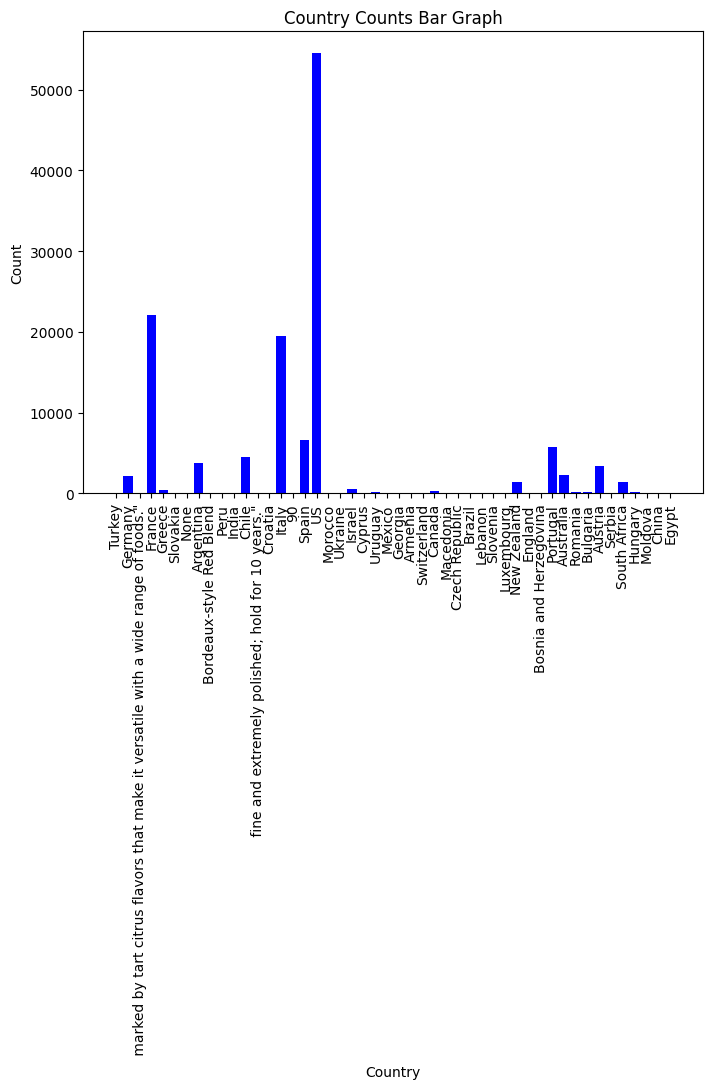

In [39]:
country_counts = df_original.groupBy("country").count()

country_counts_pd = country_counts.toPandas()

country_counts_pd['country'] = country_counts_pd['country'].astype(str)

plt.figure(figsize=(8, 6))
plt.bar(country_counts_pd["country"], country_counts_pd["count"], color='blue')

plt.title("Country Counts Bar Graph")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)

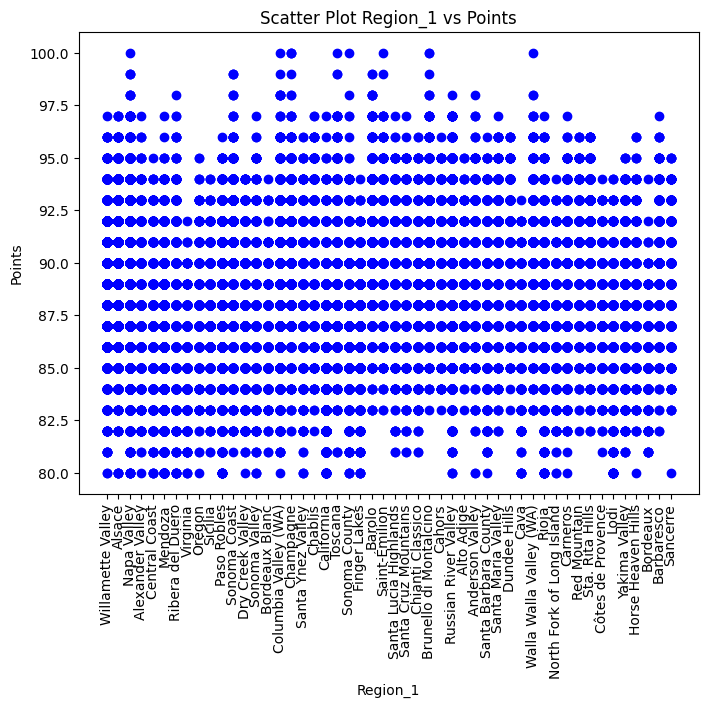

In [40]:
sub_df_region_1 = df_original.select("region_1", "points")
sub_df_noNull_region_1 = sub_df_region_1.dropna()

top_50_values = (sub_df_noNull_region_1.groupBy("region_1")
                 .count()
                 .orderBy(col("count").desc())
                 .limit(50))

top_50_values_list = [row['region_1'] for row in top_50_values.collect()]

filtered_df_sub_df_noNull_region_1 = sub_df_noNull_region_1.filter(col("region_1").isin(top_50_values_list))

pandas_df_region_1 = filtered_df_sub_df_noNull_region_1.toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(pandas_df_region_1["region_1"], pandas_df_region_1["points"], color='blue')
plt.title("Scatter Plot Region_1 vs Points")
plt.xlabel("Region_1")
plt.ylabel("Points")

plt.xticks(rotation=90)

plt.show()

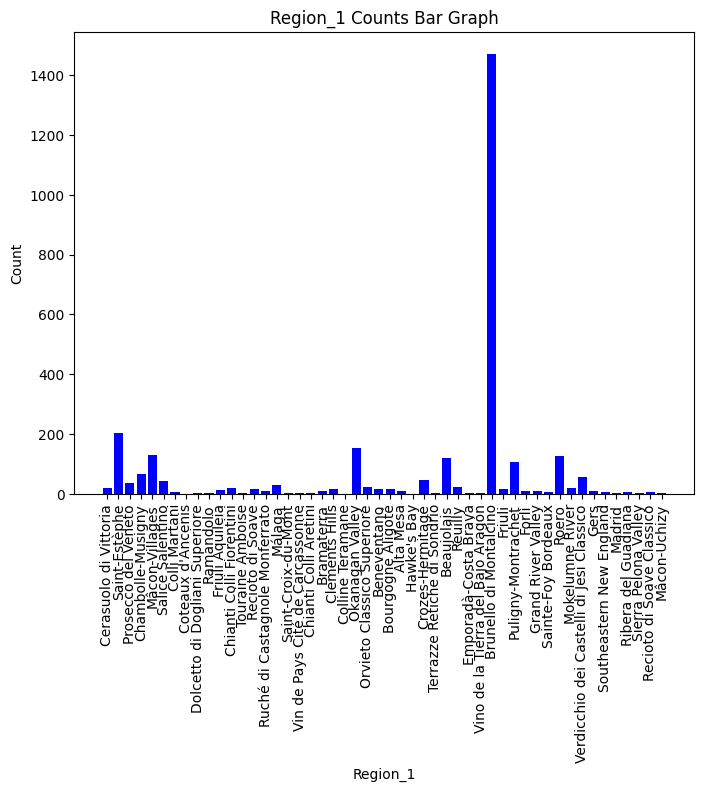

In [41]:
region_1_counts = df_original.groupBy("region_1").count()

top_50_values_region_1 = (region_1_counts.groupBy("region_1")
                 .count()
                 .orderBy(col("count").desc())
                 .limit(50))

top_50_values_list_region_1 = [row['region_1'] for row in top_50_values_region_1.collect()]

filtered_df_region_1_counts = region_1_counts.filter(col("region_1").isin(top_50_values_list_region_1))

region_1_counts_pd = filtered_df_region_1_counts.toPandas()

region_1_counts_pd['region_1'] = region_1_counts_pd['region_1'].astype(str)

plt.figure(figsize=(8, 6))
plt.bar(region_1_counts_pd["region_1"], region_1_counts_pd["count"], color='blue')

plt.title("Region_1 Counts Bar Graph")
plt.xlabel("Region_1")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()

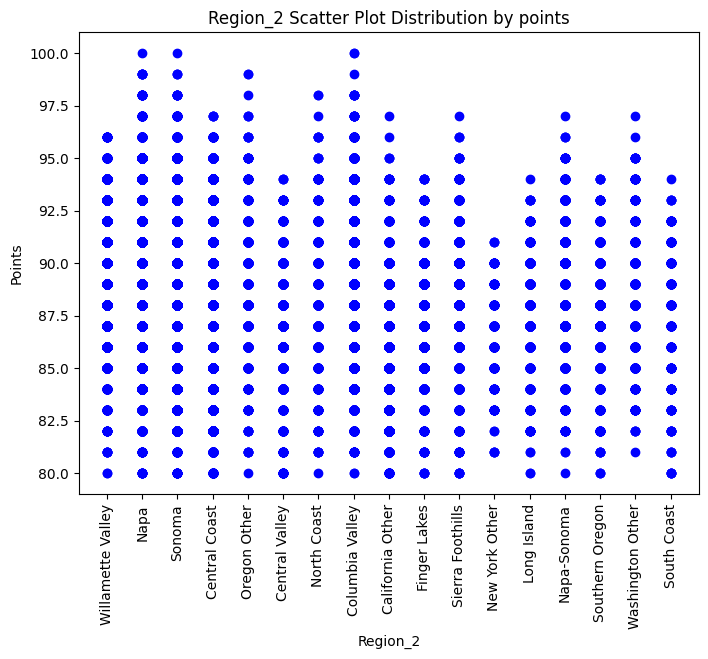

In [42]:
sub_df_region_2 = df_original.select("region_2", "points")
sub_df_noNull_region_2 = sub_df_region_2.dropna()

top_50_values_region_2 = (sub_df_noNull_region_2.groupBy("region_2")
                 .count()
                 .orderBy(col("count").desc())
                 .limit(50))

top_50_values_list_region_2 = [row['region_2'] for row in top_50_values_region_2.collect()]

filtered_df_sub_df_noNull_region_2 = sub_df_noNull_region_2.filter(col("region_2").isin(top_50_values_list_region_2))

pandas_df_region_2 = filtered_df_sub_df_noNull_region_2.toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(pandas_df_region_2["region_2"], pandas_df_region_2["points"], color='blue')
plt.title("Region_2 Scatter Plot Distribution by points")
plt.xlabel("Region_2")
plt.ylabel("Points")

plt.xticks(rotation=90)

plt.show()

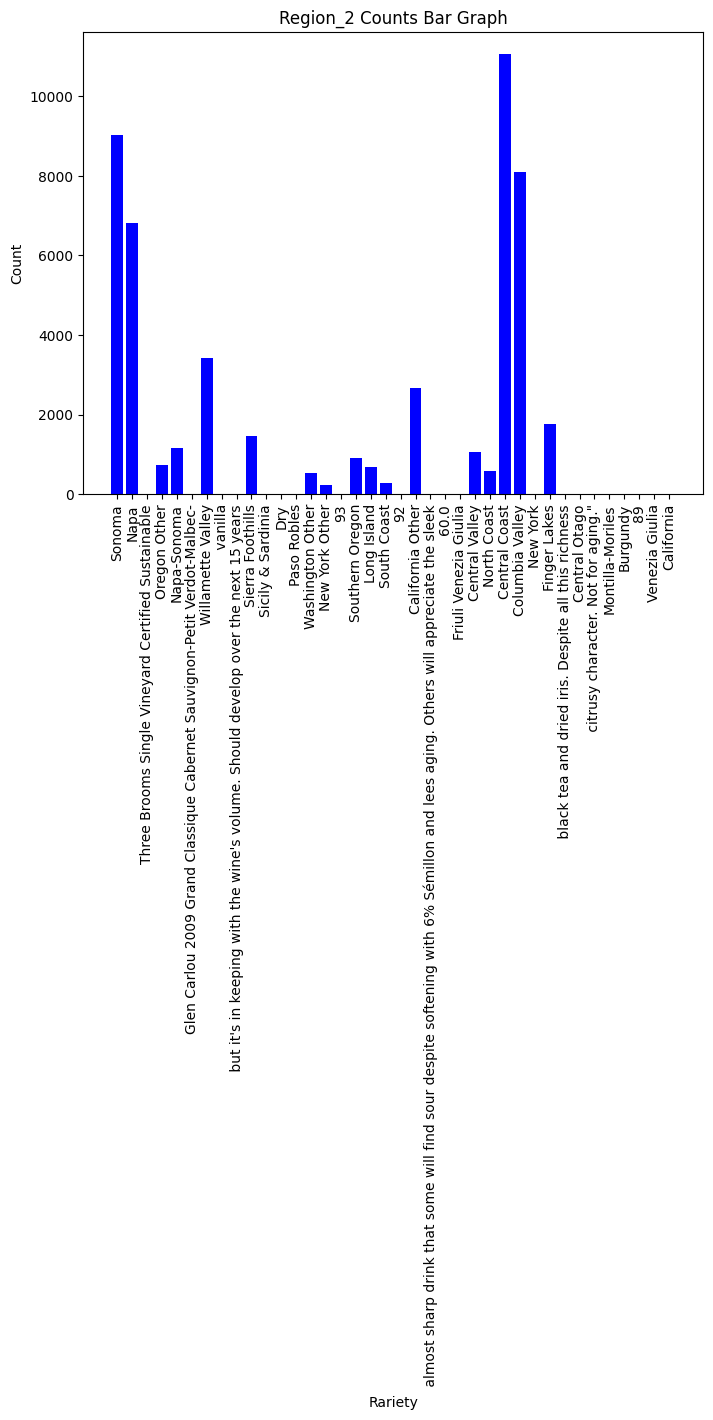

In [43]:
region_2_counts = df_original.groupBy("region_2").count()

top_50_values_region_2 = (region_2_counts.groupBy("region_2")
                 .count()
                 .orderBy(col("count").desc())
                 .limit(50))

top_50_values_list_region_2 = [row['region_2'] for row in top_50_values_region_2.collect()]

filtered_df_region_2_counts = region_2_counts.filter(col("region_2").isin(top_50_values_list_region_2))

region_2_counts_pd = filtered_df_region_2_counts.toPandas()

region_2_counts_pd['region_2'] = region_2_counts_pd['region_2'].astype(str)

plt.figure(figsize=(8, 6))
plt.bar(region_2_counts_pd["region_2"], region_2_counts_pd["count"], color='blue')

plt.title("Region_2 Counts Bar Graph")
plt.xlabel("Rariety")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()

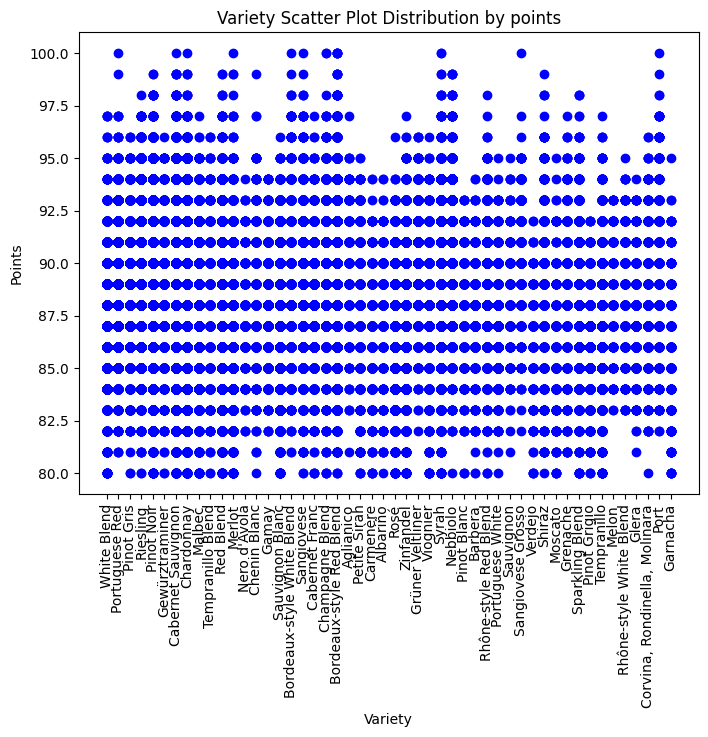

In [44]:
sub_df_variety = df_original.select("variety", "points")
sub_df_noNull_variety = sub_df_variety.dropna()

top_50_values_variety = (sub_df_noNull_variety.groupBy("variety")
                 .count()
                 .orderBy(col("count").desc())
                 .limit(50))

top_50_values_list_variety = [row['variety'] for row in top_50_values_variety.collect()]

filtered_df_sub_df_noNull_variety = sub_df_noNull_variety.filter(col("variety").isin(top_50_values_list_variety))

pandas_df_variety = filtered_df_sub_df_noNull_variety.toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(pandas_df_variety["variety"], pandas_df_variety["points"], color='blue')
plt.title("Variety Scatter Plot Distribution by points")
plt.xlabel("Variety")
plt.ylabel("Points")

plt.xticks(rotation=90)

plt.show()

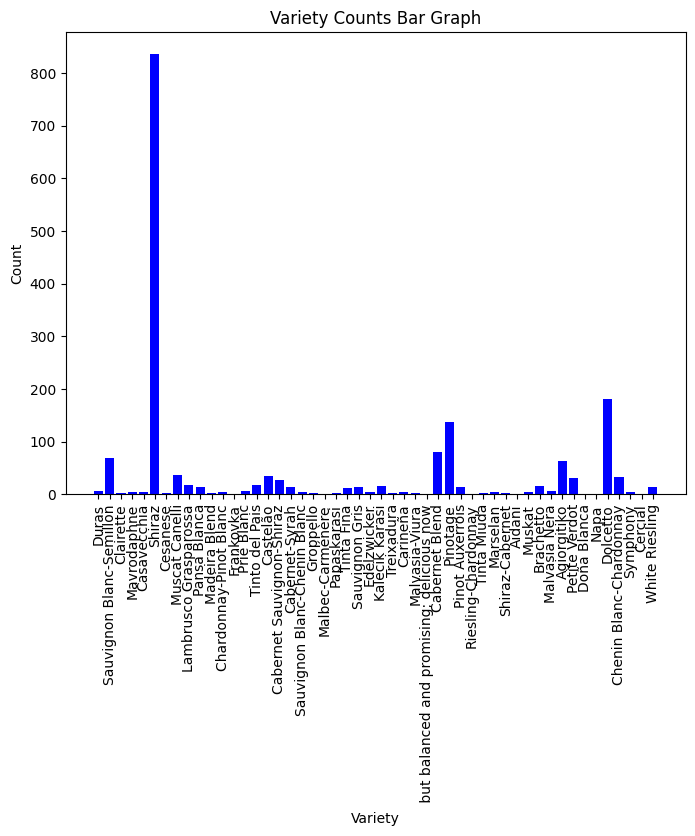

In [45]:
variety_counts = df_original.groupBy("variety").count()

top_50_values = (variety_counts.groupBy("variety")
                 .count()
                 .orderBy(col("count").desc())
                 .limit(50))

top_50_values_list = [row['variety'] for row in top_50_values.collect()]

filtered_df_variety_counts = variety_counts.filter(col("variety").isin(top_50_values_list))

variety_counts_pd = filtered_df_variety_counts.toPandas()

variety_counts_pd['variety'] = variety_counts_pd['variety'].astype(str)

plt.figure(figsize=(8, 6))
plt.bar(variety_counts_pd["variety"], variety_counts_pd["count"], color='blue')

plt.title("Variety Counts Bar Graph")
plt.xlabel("Variety")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()

In [ ]:
# "Sentiment Analaysis" - Using basic techniques for describing wines.  Found a collection of keywords and determining whether those words exist in the description or not.  If they do the corresponding
# column in the row is given a value of 1 if not the value remains 0

In [6]:
from pyspark.ml.feature import HashingTF, Tokenizer, StopWordsRemover, RegexTokenizer, CountVectorizer, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
import requests

In [59]:
sub_df_description = df_original.select("description", "points")

sub_df_description = sub_df_description.withColumn("points", col("points").cast("int"))
sub_df_description = sub_df_description.filter(sub_df_description["points"].isNotNull())
sub_df_description = sub_df_description.filter(sub_df_description["description"].isNotNull())

In [47]:
from pyspark.sql.functions import lit

sub_df_desctiption_key_wine_words = sub_df_description.select(
    "points",
    lit(0).alias("acidity"),
    lit(0).alias("aroma"),
    lit(0).alias("balanced"),
    lit(0).alias("body"),
    lit(0).alias("complex"),
    lit(0).alias("sweetness"),
    lit(0).alias("bouquet"),
    lit(0).alias("earthy"),
    lit(0).alias("tannins"),
    lit(0).alias("big"),
    lit(0).alias("buttery"),
    lit(0).alias("fermentation"),
    lit(0).alias("finish"),
    lit(0).alias("tannic"),
    lit(0).alias("aftertaste"),
    lit(0).alias("alcohol"),
    lit(0).alias("astringent"),
    lit(0).alias("delicate"),
    lit(0).alias("dry"),
    lit(0).alias("fruity"),
    lit(0).alias("light bodied"),
    lit(0).alias("nose"),
    lit(0).alias("spicy"),
    lit(0).alias("blend"),
    lit(0).alias("herbal"),
    lit(0).alias("floral"),
    lit(0).alias("nutty"),
    lit(0).alias("vanilla"),
    lit(0).alias("coconut"),
    lit(0).alias("baking spices"),
    lit(0).alias("toasted nuts"),
    lit(0).alias("tobacco"),
    lit(0).alias("full bodied"),
    lit(0).alias("savory"),
    lit(0).alias("herbaceous"),
    lit(0).alias("minerally"),
    lit(0).alias("toasty"),
    lit(0).alias("flabby"),
    lit(0).alias("supple")
)

In [48]:
sub_df_desctiption_key_wine_words_pandas = sub_df_desctiption_key_wine_words.toPandas()

In [49]:
sub_df_description_pandas = sub_df_description.toPandas()

In [50]:
sentiment_words = ["acidity", "aroma","balanced","body","complex","sweetness","bouquet","earthy","tannins","big","buttery","fermentation","finish","tannic","aftertaste","alcohol","astringent","delicate","dry","fruity","light bodied","nose","spicy","blend","herbal","floral","nutty","vanilla","coconut","baking spices","toasted nuts","tobacco","full bodied","savory","herbaceous","minerally","toasty","flabby","supple"]

In [51]:
def description_contains_sentiments(description, sentiment_words):
  list = []
  for word in sentiment_words:
    if word in description:
      list.append(word)
  return list


In [60]:
for index, row in sub_df_description_pandas.iterrows():
  description = row['description']
  #print(type(description))
  sentiment_list = description_contains_sentiments(description, sentiment_words)
  for word in sentiment_list:
    sub_df_desctiption_key_wine_words_pandas.at[index, word] = 1

In [14]:
finished_sentiment_wine_df = spark.createDataFrame(sub_df_desctiption_key_wine_words_pandas)

In [53]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [54]:
assembler = VectorAssembler(inputCols=sentiment_words, outputCol="features")
df_assembler = assembler.transform(finished_sentiment_wine_df)

train_df, test_df = df_assembler.randomSplit([0.8, 0.2], seed=42)

lr = LinearRegression(featuresCol="features", labelCol="points")
lr_model = lr.fit(train_df)

predictions = lr_model.transform(test_df)

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="points", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = lr_model.summary.r2

In [55]:
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")
print(f"R2 on test data: {r2}")

Root Mean Squared Error (RMSE) on test data: 2.903913203701626
R2 on test data: 0.09327284118743129


In [ ]:
# Going to determine if I can do the above Descriptor analysis for a single tester.  See if those values are predictive of whether or not they scored the wine higher or lower.  Using a sing user
# will help determine if those descriptors are effective for a single persons taste buds.  All of hte data together could have contradictions becasue different people have different tastes.

In [56]:
print(df_original.columns)

['_c0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [61]:
from pyspark.sql import functions as fn

df_nonull_names = df_original.select("taster_name").filter(df_original.taster_name.isNotNull())

# Assuming df is your DataFrame and 'column_name' is the column you're interested in
most_common_value = df_nonull_names.groupBy('taster_name') \
                      .agg(fn.count('*').alias('count')) \
                      .orderBy(fn.desc('count')) \
                      .first()

# most_common_value will contain the most common value in the 'column_name'
print(most_common_value)

Row(taster_name='Roger Voss', count=25513)


In [65]:
sub_df_description_Roger_Voss = df_original.filter(df_original['taster_name'] == 'Roger Voss')


sub_df_description_Roger_Voss = sub_df_description_Roger_Voss.select("description", "points")

sub_df_description_Roger_Voss = sub_df_description_Roger_Voss.withColumn("points", col("points").cast("int"))
sub_df_description_Roger_Voss = sub_df_description_Roger_Voss.filter(sub_df_description_Roger_Voss["points"].isNotNull())
sub_df_description_Roger_Voss = sub_df_description_Roger_Voss.filter(sub_df_description_Roger_Voss["description"].isNotNull())
print(sub_df_description_Roger_Voss.count())

25513


In [66]:
sub_df_desctiption_key_wine_words_Roger_Voss = sub_df_description_Roger_Voss.select(
    "points",
    lit(0).alias("acidity"),
    lit(0).alias("aroma"),
    lit(0).alias("balanced"),
    lit(0).alias("body"),
    lit(0).alias("complex"),
    lit(0).alias("sweetness"),
    lit(0).alias("bouquet"),
    lit(0).alias("earthy"),
    lit(0).alias("tannins"),
    lit(0).alias("big"),
    lit(0).alias("buttery"),
    lit(0).alias("fermentation"),
    lit(0).alias("finish"),
    lit(0).alias("tannic"),
    lit(0).alias("aftertaste"),
    lit(0).alias("alcohol"),
    lit(0).alias("astringent"),
    lit(0).alias("delicate"),
    lit(0).alias("dry"),
    lit(0).alias("fruity"),
    lit(0).alias("light bodied"),
    lit(0).alias("nose"),
    lit(0).alias("spicy"),
    lit(0).alias("blend"),
    lit(0).alias("herbal"),
    lit(0).alias("floral"),
    lit(0).alias("nutty"),
    lit(0).alias("vanilla"),
    lit(0).alias("coconut"),
    lit(0).alias("baking spices"),
    lit(0).alias("toasted nuts"),
    lit(0).alias("tobacco"),
    lit(0).alias("full bodied"),
    lit(0).alias("savory"),
    lit(0).alias("herbaceous"),
    lit(0).alias("minerally"),
    lit(0).alias("toasty"),
    lit(0).alias("flabby"),
    lit(0).alias("supple")
)

In [67]:
sub_df_desctiption_key_wine_words_Roger_Voss_pandas = sub_df_desctiption_key_wine_words_Roger_Voss.toPandas()

In [68]:
sub_df_description_Roger_Voss_pandas = sub_df_description_Roger_Voss.toPandas()

In [69]:
for index, row in sub_df_description_Roger_Voss_pandas.iterrows():
  description = row['description']
  #print(type(description))
  sentiment_list = description_contains_sentiments(description, sentiment_words)
  for word in sentiment_list:
    sub_df_desctiption_key_wine_words_Roger_Voss_pandas.at[index, word] = 1

In [70]:
finished_sentiment_wine_df_Roger_Voss = spark.createDataFrame(sub_df_desctiption_key_wine_words_Roger_Voss_pandas)

In [71]:
assembler = VectorAssembler(inputCols=sentiment_words, outputCol="features")
df_assembler = assembler.transform(finished_sentiment_wine_df_Roger_Voss)

train_df, test_df = df_assembler.randomSplit([0.8, 0.2], seed=42)

lr = LinearRegression(featuresCol="features", labelCol="points")
lr_model = lr.fit(train_df)

predictions = lr_model.transform(test_df)

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="points", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = lr_model.summary.r2

In [72]:
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")
print(f"R2 on test data: {r2}")

Root Mean Squared Error (RMSE) on test data: 2.8516776591049067
R2 on test data: 0.12421438898319104


In [ ]:
# Doing an additional "Sentiment Analysis" where we will count the number of describers given from the above list, but instead of having multiple columns just having 1 and and will try to "estimate"
# Sentiment.

In [73]:
sub_df_desctiption_key_wine_words = sub_df_description.select(
    "points",
    lit(0).alias("sentiment")
)

In [74]:
sub_df_desctiption_key_wine_words_pandas = sub_df_desctiption_key_wine_words.toPandas()

In [75]:
for index, row in sub_df_description_pandas.iterrows():
  description = row['description']
  sentiment_list = description_contains_sentiments(description, sentiment_words)
  sub_df_desctiption_key_wine_words_pandas.at[index, "sentiment"] = len(sentiment_list)

In [76]:
finished_sentiment_wine_df = spark.createDataFrame(sub_df_desctiption_key_wine_words_pandas)

In [77]:
sub_df_desctiption_key_wine_words_pandas.head()

,points,sentiment
0,87,1
1,87,3
2,87,1
3,87,4
4,87,3


In [78]:
assembler = VectorAssembler(inputCols=["sentiment"], outputCol="features")
df = assembler.transform(finished_sentiment_wine_df)

train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

lr = LinearRegression(featuresCol="features", labelCol="points")
lr_model = lr.fit(train_df)

predictions = lr_model.transform(test_df)

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="points", metricName="rmse")
rmse = evaluator.evaluate(predictions)
r2 = lr_model.summary.r2

In [79]:
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")
print(f"R2 on test data: {r2}")

Root Mean Squared Error (RMSE) on test data: 3.021563846554339
R2 on test data: 0.008480075974308998
